In [18]:
## Import libraries to read dataset named Loan Default
## Import proper statistical library
import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("Loan_Defaults.csv", index_col=0)
df

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,...,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
655269,53478,63558,86.54,67,22807,45,1497,01-01-1974,Salaried,03-11-2018,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
723482,55513,63163,89.45,67,22807,45,1497,20-05-1985,Self employed,20-11-2018,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
758529,65282,84320,79.93,78,23135,86,2071,14-10-1995,Salaried,29-11-2018,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
763449,46905,63896,76.58,78,17014,45,2070,01-06-1973,Self employed,29-11-2018,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
708663,51428,63896,86.08,78,17014,45,2069,01-06-1972,Salaried,17-11-2018,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755547,44875,72509,67.58,74,16646,86,2591,14-05-1992,Self employed,28-11-2018,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
716994,53549,72509,78.61,74,16646,86,2593,24-04-1984,Self employed,19-11-2018,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
709352,55243,72509,81.37,74,16646,86,2593,01-01-1986,Self employed,17-11-2018,...,0,0,0,0,0,0,0,4yrs 10mon,9yrs 5mon,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112392 entries, 655269 to 755244
Data columns (total 39 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   DISBURSED_AMOUNT                     112392 non-null  int64  
 1   ASSET_COST                           112392 non-null  int64  
 2   LTV                                  112392 non-null  float64
 3   BRANCH_ID                            112392 non-null  int64  
 4   SUPPLIER_ID                          112392 non-null  int64  
 5   MANUFACTURER_ID                      112392 non-null  int64  
 6   CURRENT_PINCODE_ID                   112392 non-null  int64  
 7   DATE_OF_BIRTH                        112392 non-null  object 
 8   EMPLOYMENT_TYPE                      108949 non-null  object 
 9   DISBURSAL_DATE                       112392 non-null  object 
 10  STATE_ID                             112392 non-null  int64  
 11  EMPLOYEE

In [2]:
## Calculate Mean, Median, Mode, and Standard Deviation of the amount of Loan disbursed in the column named disbursed_amount.

In [22]:
df['DISBURSED_AMOUNT'].mean()

56076.80326891594

In [24]:
df['DISBURSED_AMOUNT'].median()

55359.0

In [25]:
df['DISBURSED_AMOUNT'].mode()

0    53303
dtype: int64

In [47]:
df['DISBURSED_AMOUNT'].std()

13123.697627449983

In [51]:
# Explain your findings for a value of your choice
df['LTV'].describe()

count    112392.000000
mean         75.310325
std          11.006380
min          10.030000
25%          69.970000
50%          77.780000
75%          83.740000
max          95.000000
Name: LTV, dtype: float64

In [54]:
df['LTV'].mode()

0    85.0
dtype: float64

The loan-to-value ratio (LTV), 
(the typical LTV is between 75-85)
mean:75
median:77 
mode:85
std:11

-The data is slightly skewed to the left. 
 -Mean value is less than median, and Mode is bigger.
-smaller standard deviation implies that the data points are more crowded around the mean, which means less extreme values

However,
min=10
max=95

means the data has outliers
which can change the results of the data analysis and statistical modeling

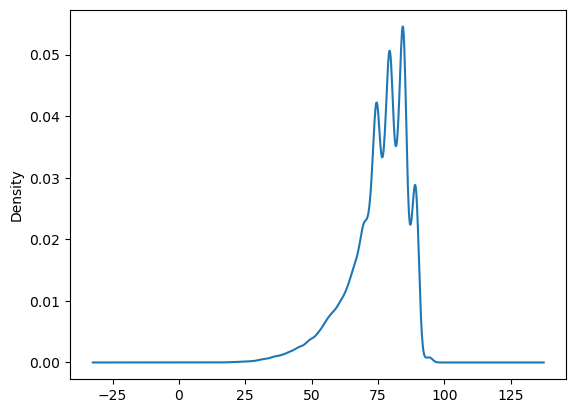

In [59]:
df['LTV'].plot.kde();

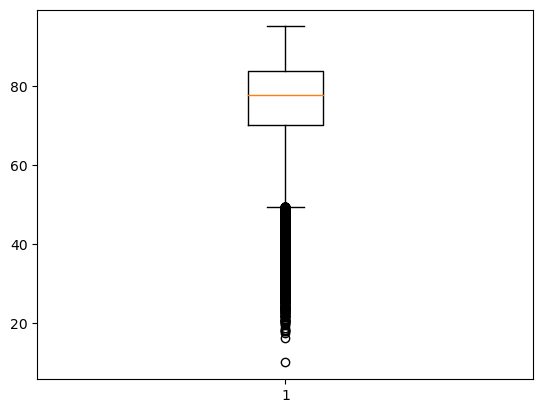

In [61]:
plt.boxplot(df['LTV']);

In [3]:
## Write a SQL query to calculate the mean of the variable disbursed_amount. Let the table be loan_defaults.
# These conditions applies to the query results:  for the salaried segment who have the time since their first loan been over 9 years

In [46]:
q1 = 'SELECT avg(disbursed_amount) FROM df where CREDIT_HISTORY_LENGTH like "9yrs%" order by CREDIT_HISTORY_LENGTH '
print(ps.sqldf(q1, locals()))

   avg(disbursed_amount)
0           56239.447084
